# Homework RNNs
1. Download and explore data
2. Preproceess data if needed
3. Create a dataset with group of inputs of some size (between 10 and 50) - Similar to this [example](https://colab.research.google.com/drive/1tj0DRWxVvRC7_b7ubQ46zJo4ZuxT4jbW?authuser=1)
4. Split the data into train and test
5. Use 1 different RNN type

In [1]:
!wget https://storage.googleapis.com/nicksdemobucket/sunspots.csv

# OR

!wget https://storage.googleapis.com/nicksdemobucket/temperatures.csv

# OR MNIST

--2021-05-11 19:29:04--  https://storage.googleapis.com/nicksdemobucket/sunspots.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45039 (44K) [application/octet-stream]
Saving to: ‘sunspots.csv’

sunspots.csv        100%[===================>]  43.98K  --.-KB/s    in 0.001s  

2021-05-11 19:29:04 (82.6 MB/s) - ‘sunspots.csv’ saved [45039/45039]

--2021-05-11 19:29:04--  https://storage.googleapis.com/nicksdemobucket/temperatures.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/csv]
Saving to: ‘temperatures.csv’

temperatures.csv    100%[=

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('sunspots.csv')
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [3]:
from pandas.tseries.offsets import MonthEnd
df['Month'] = pd.to_datetime(df['Month']) + MonthEnd(1)
df = df.set_index('Month')
df.head()

,Sunspots
Month,
1749-01-31,58.0
1749-02-28,62.6
1749-03-31,70.0
1749-04-30,55.7
1749-05-31,85.0


In [4]:
df.shape

(2820, 1)

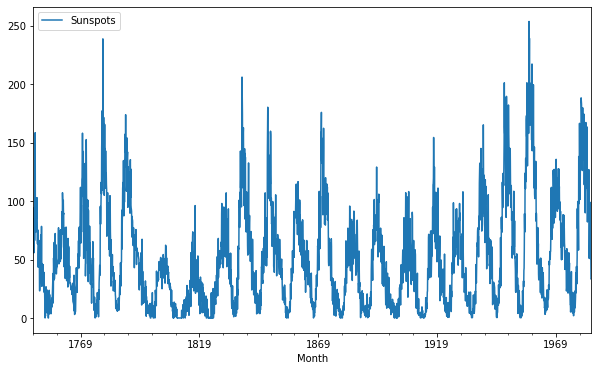

In [5]:
# Graph of the data
df.plot(figsize=(10, 6))

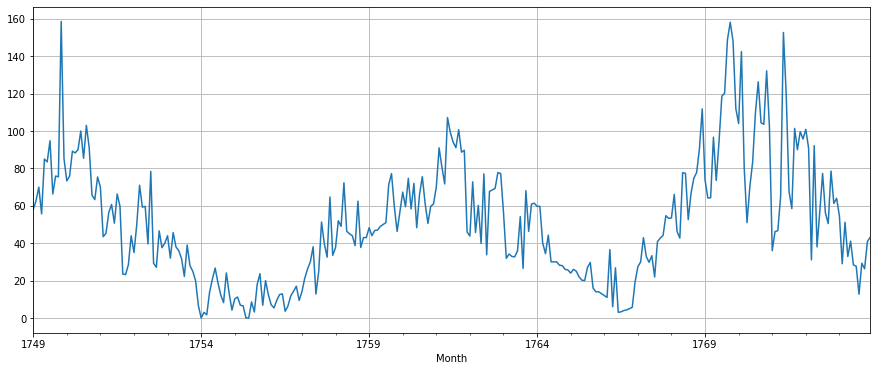

In [6]:
# zoom into the plot, the seasonality is roughly 11 years
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
df[:300]['Sunspots'].plot()
plt.grid()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


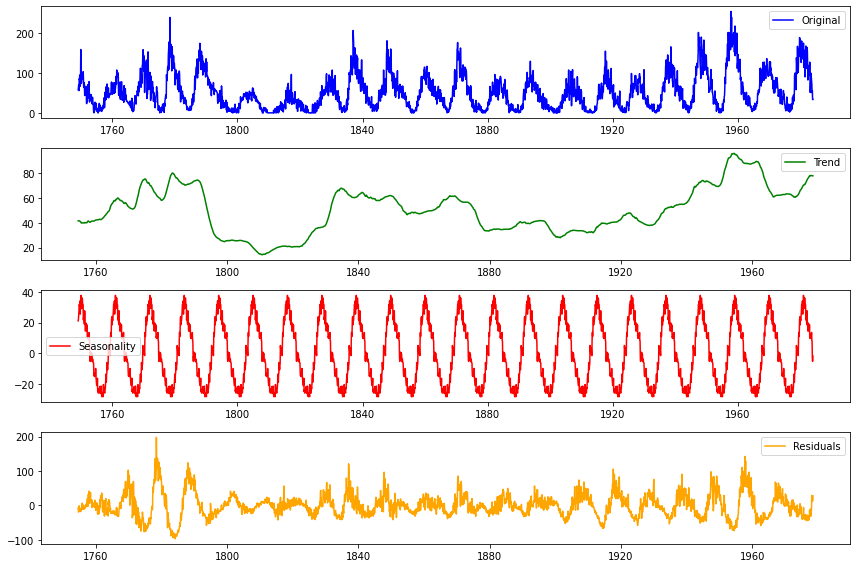

In [7]:
# Graph of decomposition (trend, seasonal, noise)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Sunspots'], freq = 11*12) # Data Trend is repeated after every 11 year,freq=11*12

# get the trend, seasonality and noise 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Sunspots'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="green")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="red")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="orange")
plt.legend(loc='best')
plt.tight_layout()

In [8]:
import random
random.seed(30)

In [9]:
print(df.iloc[1974])  # 70% of the data
print(df.iloc[2538])  # 90% of the data

Sunspots    1.7
Name: 1913-07-31 00:00:00, dtype: float64
Sunspots    121.7
Name: 1960-07-31 00:00:00, dtype: float64


In [10]:
# Split the data (train, valid, test)
split_date_1 = pd.Timestamp('01-01-1913') # around 70% of the data
split_date_2 = pd.Timestamp('01-01-1960') # around 90% of the data
train = df.loc[:split_date_1, ['Sunspots']]
valid = df.loc[split_date_1:split_date_2, ['Sunspots']]
test = df.loc[split_date_2:, ['Sunspots']]

In [11]:
print(train.tail())
print(valid.head())
print(valid.tail())
print(test.head())

            Sunspots
Month               
1912-08-31       0.3
1912-09-30       9.5
1912-10-31       4.6
1912-11-30       1.1
1912-12-31       6.4
            Sunspots
Month               
1913-01-31       2.3
1913-02-28       2.9
1913-03-31       0.5
1913-04-30       0.9
1913-05-31       0.0
            Sunspots
Month               
1959-08-31     199.6
1959-09-30     145.2
1959-10-31     111.4
1959-11-30     124.0
1959-12-31     125.0
            Sunspots
Month               
1960-01-31     146.3
1960-02-29     106.0
1960-03-31     102.2
1960-04-30     122.0
1960-05-31     119.6


In [12]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
valid_sc = sc.transform(valid)
test_sc = sc.transform(test)

In [13]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
valid_sc_df = pd.DataFrame(valid_sc, columns=['Scaled'], index=valid.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
Month,
1749-01-31,0.242779
1749-02-28,0.262034
1749-03-31,0.293010
1749-04-30,0.233152
1749-05-31,0.355797


In [14]:
train_sc.shape

(1968, 1)

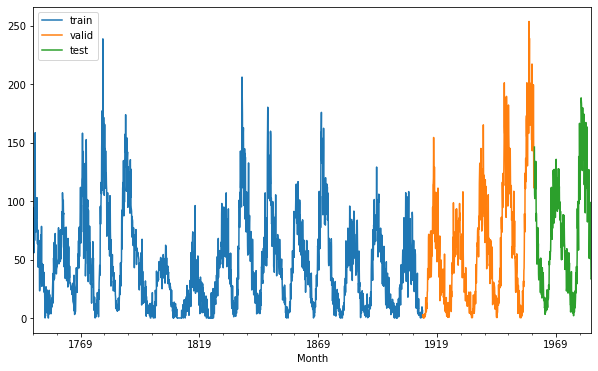

In [15]:
# Graph on train, valid, test data
ax = train.plot(figsize=(10, 6))
valid.plot(ax=ax)
test.plot(ax=ax)
plt.legend(['train','valid','test'])

In [16]:
# Create slinding window
for s in range(1, 11):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    valid_sc_df['shift_{}'.format(s)] = valid_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [17]:
train_sc_df.head()

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10
Month,,,,,,,,,,,
1749-01-31,0.242779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749-02-28,0.262034,0.242779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749-03-31,0.293010,0.262034,0.242779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749-04-30,0.233152,0.293010,0.262034,0.242779,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749-05-31,0.355797,0.233152,0.293010,0.262034,0.242779,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
X_train = train_sc_df.dropna().drop(['Scaled'], axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_valid = valid_sc_df.dropna().drop(['Scaled'], axis=1)
y_valid = valid_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop(['Scaled'], axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [19]:
print(X_test.shape)
print(y_test.shape)

(278, 10)
(278, 1)


In [20]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10
Month,,,,,,,,,,
1749-11-30,0.316032,0.317706,0.277522,0.396819,0.349519,0.355797,0.233152,0.293010,0.262034,0.242779
1749-12-31,0.663876,0.316032,0.317706,0.277522,0.396819,0.349519,0.355797,0.233152,0.293010,0.262034
1750-01-31,0.356635,0.663876,0.316032,0.317706,0.277522,0.396819,0.349519,0.355797,0.233152,0.293010
1750-02-28,0.306823,0.356635,0.663876,0.316032,0.317706,0.277522,0.396819,0.349519,0.355797,0.233152
1750-03-31,0.317706,0.306823,0.356635,0.663876,0.316032,0.317706,0.277522,0.396819,0.349519,0.355797


In [21]:
y_train.head()

,Scaled
Month,
1749-11-30,0.663876
1749-12-31,0.356635
1750-01-31,0.306823
1750-02-28,0.317706
1750-03-31,0.373378


In [22]:
X_train.shape

(1958, 10)

In [23]:
X_train = X_train.values
X_valid = X_valid.values
X_test= X_test.values

y_train = y_train.values
y_valid = y_valid.values
y_test = y_test.values

In [24]:
X_train.shape

(1958, 10)

# **MLP**
Not NRR but keep for comparaison

In [25]:
import keras.backend as K
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

K.clear_session()

model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [26]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)

In [27]:
h=model.fit(X_train, y_train, epochs=200,
          batch_size=2, verbose=1, callbacks=[early_stop], validation_data=(X_valid, y_valid))

Epoch 1/200
979/979 [==============================] - 2s 2ms/step - loss: 0.0793 - val_loss: 0.0101
Epoch 2/200
979/979 [==============================] - 1s 1ms/step - loss: 0.0058 - val_loss: 0.0069
Epoch 3/200
979/979 [==============================] - 1s 1ms/step - loss: 0.0042 - val_loss: 0.0063
Epoch 4/200
979/979 [==============================] - 1s 1ms/step - loss: 0.0041 - val_loss: 0.0069
Epoch 5/200
979/979 [==============================] - 1s 1ms/step - loss: 0.0043 - val_loss: 0.0064
Epoch 6/200
979/979 [==============================] - 1s 1ms/step - loss: 0.0041 - val_loss: 0.0060
Epoch 7/200
979/979 [==============================] - 1s 1ms/step - loss: 0.0038 - val_loss: 0.0058
Epoch 8/200
979/979 [==============================] - 1s 1ms/step - loss: 0.0050 - val_loss: 0.0071
Epoch 9/200
979/979 [==============================] - 1s 1ms/step - loss: 0.0042 - val_loss: 0.0066
Epoch 10/200
979/979 [==============================] - 1s 1ms/step - loss: 0.0041 - val_lo

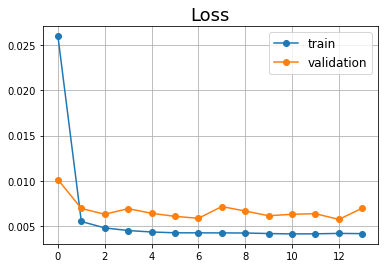

In [28]:
plt.title('Loss', fontsize=18)
plt.plot(h.history['loss'], 'o-',label='train')
plt.plot(h.history['val_loss'], 'o-',label='validation')
plt.legend(fontsize=12)
plt.grid()

In [29]:
y_pred = model.predict(X_test)

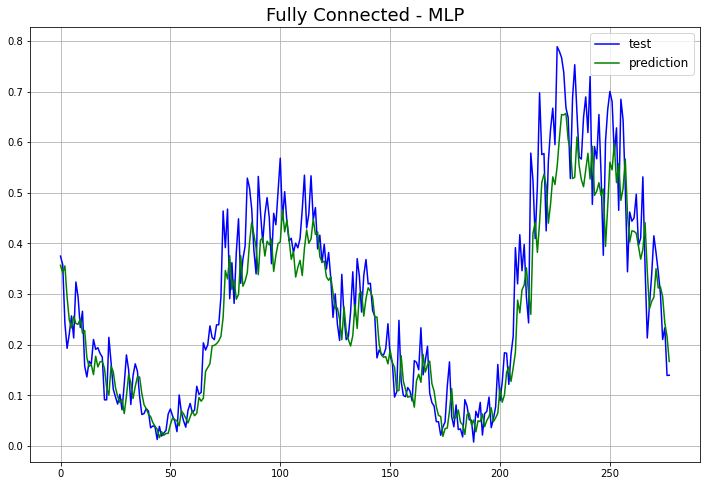

In [30]:
plt.figure(figsize=(12,8))
plt.title('Fully Connected - MLP', fontsize=18)
plt.plot(y_test, 'b',label='test')
plt.plot(y_pred, 'g',label='prediction')
plt.legend(fontsize=12)
plt.grid()

## **LSTM's**

In [31]:
X_train_t = X_train.reshape(X_train.shape[0], 1, 10)
X_valid_t = X_valid.reshape(X_valid.shape[0], 1, 10)
X_test_t = X_test.reshape(X_test.shape[0], 1, 10)

In [32]:
X_train.shape

(1958, 10)

In [33]:
from keras.layers import LSTM, GRU
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 10)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6)                 408       
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 415
Trainable params: 415
Non-trainable params: 0
_________________________________________________________________


In [34]:
h=model.fit(X_train_t, y_train, epochs=200,
          batch_size=32, verbose=1, callbacks=[early_stop], validation_data=(X_valid_t, y_valid))

Epoch 1/200
62/62 [==============================] - 2s 10ms/step - loss: 0.0851 - val_loss: 0.0582
Epoch 2/200
62/62 [==============================] - 0s 2ms/step - loss: 0.0217 - val_loss: 0.0206
Epoch 3/200
62/62 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.0129
Epoch 4/200
62/62 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.0105
Epoch 5/200
62/62 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0094
Epoch 6/200
62/62 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0091
Epoch 7/200
62/62 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0087
Epoch 8/200
62/62 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0085
Epoch 9/200
62/62 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0083
Epoch 10/200
62/62 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0080
Epoch 11

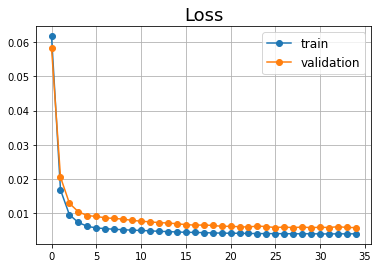

In [35]:
plt.title('Loss', fontsize=18)
plt.plot(h.history['loss'], 'o-',label='train')
plt.plot(h.history['val_loss'], 'o-',label='validation')
plt.legend(fontsize=12)
plt.grid()

In [36]:
y_pred = model.predict(X_test_t)

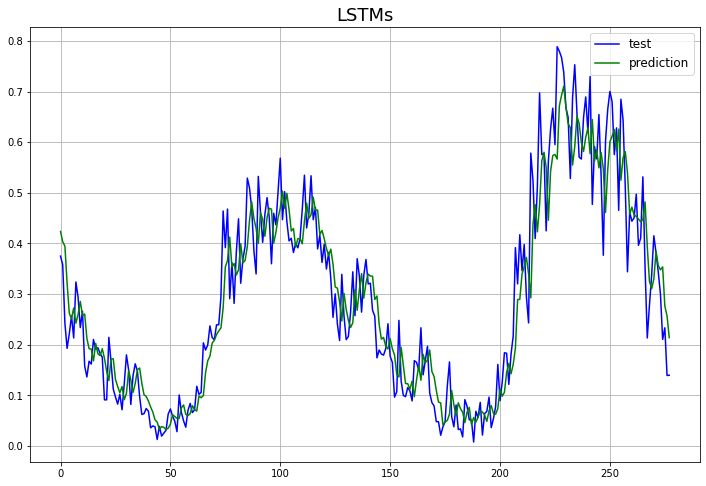

In [37]:
plt.figure(figsize=(12,8))
plt.title('LSTMs', fontsize=18)
plt.plot(y_test, 'b',label='test')
plt.plot(y_pred, 'g',label='prediction')
plt.legend(fontsize=12)
plt.grid()

# **Simple RNN's**

In [38]:
K.clear_session()
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 10])
])

model.compile(loss="mse", optimizer='adam')
h = model.fit(X_train_t, y_train, epochs=200, callbacks=[early_stop], validation_data=(X_valid_t, y_valid))

Epoch 1/200
62/62 [==============================] - 1s 6ms/step - loss: 0.0367 - val_loss: 0.0187
Epoch 2/200
62/62 [==============================] - 0s 2ms/step - loss: 0.0122 - val_loss: 0.0113
Epoch 3/200
62/62 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.0104
Epoch 4/200
62/62 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0100
Epoch 5/200
62/62 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0097
Epoch 6/200
62/62 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0096
Epoch 7/200
62/62 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0094
Epoch 8/200
62/62 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0094
Epoch 9/200
62/62 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0093
Epoch 10/200
62/62 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0093
Epoch 11/

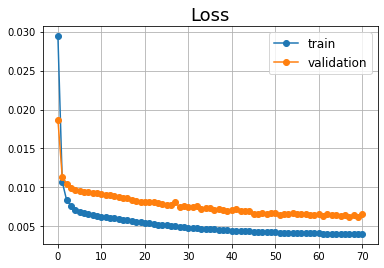

In [39]:
plt.title('Loss', fontsize=18)
plt.plot(h.history['loss'], 'o-',label='train')
plt.plot(h.history['val_loss'], 'o-',label='validation')
plt.legend(fontsize=12)
plt.grid()

In [40]:
y_pred = model.predict(X_test_t)

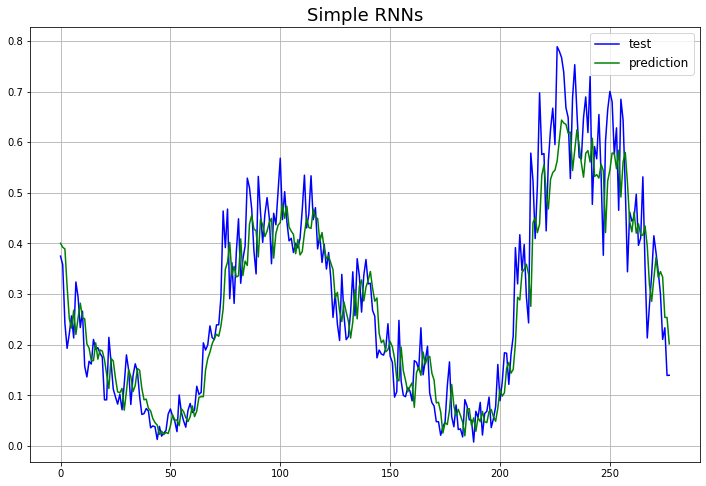

In [41]:
plt.figure(figsize=(12,8))
plt.title('Simple RNNs', fontsize=18)
plt.plot(y_test, 'b',label='test')
plt.plot(y_pred, 'g',label='prediction')
plt.legend(fontsize=12)
plt.grid()

# **GRU's**

In [42]:
K.clear_session()
model = Sequential()

model.add(GRU(6, input_shape=(1, 10)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 6)                 324       
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [43]:
h=model.fit(X_train_t, y_train, epochs=200,
          batch_size=32, verbose=1, callbacks=[early_stop], validation_data=(X_valid_t, y_valid))

Epoch 1/200
62/62 [==============================] - 2s 10ms/step - loss: 0.0417 - val_loss: 0.0178
Epoch 2/200
62/62 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.0126
Epoch 3/200
62/62 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0104
Epoch 4/200
62/62 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0102
Epoch 5/200
62/62 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0097
Epoch 6/200
62/62 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0093
Epoch 7/200
62/62 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0093
Epoch 8/200
62/62 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.0092
Epoch 9/200
62/62 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0091
Epoch 10/200
62/62 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0086
Epoch 11

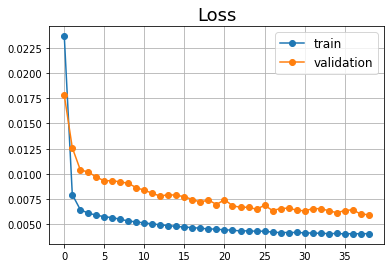

In [44]:
plt.title('Loss', fontsize=18)
plt.plot(h.history['loss'], 'o-',label='train')
plt.plot(h.history['val_loss'], 'o-',label='validation')
plt.legend(fontsize=12)
plt.grid()

In [45]:
y_pred = model.predict(X_test_t)

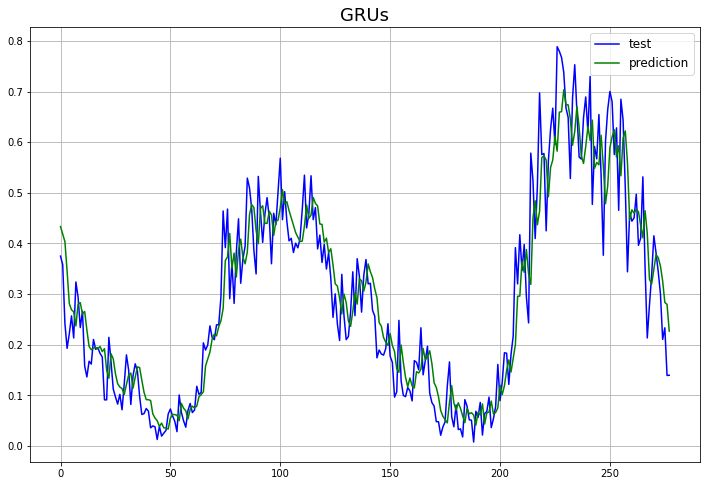

In [46]:
plt.figure(figsize=(12,8))
plt.title('GRUs', fontsize=18)
plt.plot(y_test, 'b',label='test')
plt.plot(y_pred, 'g',label='prediction')
plt.legend(fontsize=12)
plt.grid()